In [485]:
# Import required libraries

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [486]:
# Collecting data

url_tv_strategy = "http://161.97.165.206:57895/services/tv_internal_strategy"
data = pd.read_json(url_tv_strategy)

# data.columns = [
#     'time', 
#     'open', 
#     'high', 
#     'low', 
#     'close', 
#     'volume', 
#     'close_time', 
#     'quote_asset_volume', 
#     'number_of_trades', 
#     'taker_buy_base_asset_volume', 
#     'taker_buy_quote_asset_volume', 
#     'unused'
# ]

# data['date'] = pd.to_datetime(df['time'], unit='ms')
data.tail(5)

,time,Supertrend_$time,Supertrend_Plot,Supertrend_Up_Trend,Supertrend_Down_Trend,Supertrend_indicator,SMA_30_$time,SMA_30_MA,SMA_30_Smoothing_Line,SMA_30_indicator,...,candle_min,candle_volume,candle_indicator,round,round_position,round_position_value,round_close_at,round_lock_price,round_close_price,round_noroundid
996,1668331800,1668331800,276.25,1.000000e+100,278.423899,Supertrend,1668331800,278.973333,279.296000,SMA_30,...,275.7,149.42,candle,120131,Bull,1,2022-11-13 09:34:29,276.3,277.17972,
997,1668331440,1668331440,276.85,1.000000e+100,278.423899,Supertrend,1668331440,279.310000,279.592667,SMA_30,...,276.6,66.48,candle,120130,Bear,0,2022-11-13 09:29:23,276.9725,276.3,
998,1668331080,1668331080,277.05,1.000000e+100,278.423899,Supertrend,1668331080,279.606667,279.854667,SMA_30,...,276.6,59.26,candle,120129,Bear,0,2022-11-13 09:24:14,277.47571999,276.9725,
999,1668330900,1668330900,277.55,1.000000e+100,278.423899,Supertrend,1668330900,279.743333,279.978000,SMA_30,...,277.0,213.22,candle,120128,Bull,1,2022-11-13 09:19:08,276.16728543,277.47571999,
1000,1668330540,1668330540,276.00,1.000000e+100,278.423899,Supertrend,1668330540,279.966667,280.191333,SMA_30,...,275.6,101.18,candle,120127,Bear,0,2022-11-13 09:14:02,276.37908421,276.16728543,


In [487]:
# Remove unused columns
data.drop([
    'time',
    'Supertrend_$time',
    'Supertrend_indicator',
    'SMA_30_$time',
    'SMA_30_indicator',
    'SMA_50_$time',
    'SMA_50_indicator',
    'SMA_100_$time',
    'SMA_100_indicator',
    'SMA_200_$time',
    'SMA_200_indicator',
    'EMA_30_$time',
    'EMA_30_indicator',
    'EMA_50_$time',
    'EMA_50_indicator',
    'EMA_100_$time',
    'EMA_100_indicator',
    'EMA_200_$time',
    'EMA_200_indicator',
    'RSI_$time',
    'RSI_indicator',
    'RSI_Upper_Bollinger_Band',
    'RSI_Lower_Bollinger_Band',
    'RSI_fill_1_colorer',
    'Stochastic_$time',
    'Stochastic_indicator',
    'Bollinger_Bands_$time',
    'Bollinger_Bands_indicator',
    'ATR_$time',
    'ATR_indicator',
    'candle_time',
    'candle_indicator',
    'round',
    'round_position',
    'round_close_at',
    'round_lock_price',
    'round_close_price'], axis=1, inplace=True)

data.tail(5)

,Supertrend_Plot,Supertrend_Up_Trend,Supertrend_Down_Trend,SMA_30_MA,SMA_30_Smoothing_Line,SMA_50_MA,SMA_50_Smoothing_Line,SMA_100_MA,SMA_100_Smoothing_Line,SMA_200_MA,...,Bollinger_Bands_Upper,Bollinger_Bands_Lower,ATR_ATR,candle_open,candle_close,candle_max,candle_min,candle_volume,round_position_value,round_noroundid
996,276.25,1.000000e+100,278.423899,278.973333,279.296000,279.606,279.7524,281.331,281.5032,282.0790,...,281.456975,274.873025,0.854966,275.7,276.8,276.9,275.7,149.42,1,
997,276.85,1.000000e+100,278.423899,279.310000,279.592667,279.752,279.9120,281.507,281.6698,282.1285,...,281.925658,275.274342,0.796254,277.1,276.6,277.1,276.6,66.48,0,
998,277.05,1.000000e+100,278.423899,279.606667,279.854667,279.914,280.0832,281.672,281.8328,282.1845,...,282.176402,275.753598,0.876857,277.5,276.6,277.5,276.6,59.26,0,
999,277.55,1.000000e+100,278.423899,279.743333,279.978000,280.002,280.1788,281.755,281.9190,282.2140,...,282.244412,276.075588,0.840953,277.3,277.8,278.0,277.0,213.22,1,
1000,276.00,1.000000e+100,278.423899,279.966667,280.191333,280.164,280.3644,281.908,282.0914,282.2645,...,282.305240,276.574760,0.791300,275.9,276.1,276.5,275.6,101.18,0,


In [488]:
data.head(1)

,Supertrend_Plot,Supertrend_Up_Trend,Supertrend_Down_Trend,SMA_30_MA,SMA_30_Smoothing_Line,SMA_50_MA,SMA_50_Smoothing_Line,SMA_100_MA,SMA_100_Smoothing_Line,SMA_200_MA,...,Bollinger_Bands_Upper,Bollinger_Bands_Lower,ATR_ATR,candle_open,candle_close,candle_max,candle_min,candle_volume,round_position_value,round_noroundid
0,270.8,1.000000e+100,270.89174,270.336667,270.352667,270.338,270.2892,270.549,270.5904,270.9575,...,270.896731,269.523269,0.488188,270.8,270.8,270.9,270.7,46.18,,FIRST


In [489]:
# Set maindataset
main_data = data.copy()

In [490]:
# Separate FIRST to prediction set and remove from main data set, also remove round_noroundid column
data_prediction = main_data.loc[main_data['round_noroundid'] == 'FIRST'].copy()
data_prediction.drop(['round_noroundid'], axis=1, inplace=True)

main_data.drop(main_data[main_data['round_noroundid'] == 'FIRST'].index, inplace=True)
main_data.drop(['round_noroundid'], axis=1, inplace=True)

# Convert round position value (future y) to float
# main_data['round_position_value'] = pd.to_numeric(main_data['round_position_value'])
main_data['round_position_value'] = main_data['round_position_value'].astype(float)

data_prediction

,Supertrend_Plot,Supertrend_Up_Trend,Supertrend_Down_Trend,SMA_30_MA,SMA_30_Smoothing_Line,SMA_50_MA,SMA_50_Smoothing_Line,SMA_100_MA,SMA_100_Smoothing_Line,SMA_200_MA,...,Bollinger_Bands_Basis,Bollinger_Bands_Upper,Bollinger_Bands_Lower,ATR_ATR,candle_open,candle_close,candle_max,candle_min,candle_volume,round_position_value
0,270.8,1.000000e+100,270.89174,270.336667,270.352667,270.338,270.2892,270.549,270.5904,270.9575,...,270.21,270.896731,269.523269,0.488188,270.8,270.8,270.9,270.7,46.18,


In [491]:
main_data.head(5)

,Supertrend_Plot,Supertrend_Up_Trend,Supertrend_Down_Trend,SMA_30_MA,SMA_30_Smoothing_Line,SMA_50_MA,SMA_50_Smoothing_Line,SMA_100_MA,SMA_100_Smoothing_Line,SMA_200_MA,...,Bollinger_Bands_Basis,Bollinger_Bands_Upper,Bollinger_Bands_Lower,ATR_ATR,candle_open,candle_close,candle_max,candle_min,candle_volume,round_position_value
1,270.00,1.000000e+100,2.708917e+02,270.383333,270.430000,270.252,270.2476,270.635,270.6768,271.0005,...,270.200,270.844981,269.555019,0.577378,270.1,269.9,270.1,269.9,65.75,1.0
2,270.00,1.000000e+100,2.708917e+02,270.413333,270.452000,270.248,270.2508,270.654,270.6982,271.0145,...,270.235,270.886997,269.583003,0.619309,270.0,270.0,270.2,270.0,51.55,1.0
3,269.70,1.000000e+100,2.708917e+02,270.446667,270.489333,270.242,270.2652,270.698,270.7412,271.0340,...,270.295,270.977569,269.612431,0.695443,269.7,269.7,269.7,269.3,136.52,1.0
4,270.00,1.000000e+100,2.708917e+02,270.493333,270.506667,270.268,270.2740,270.742,270.7798,271.0530,...,270.400,270.965685,269.834315,0.742522,270.2,269.8,270.2,269.8,58.12,0.0
5,270.35,2.698211e+02,1.000000e+100,270.516667,270.504000,270.278,270.2712,270.763,270.7950,271.0610,...,270.445,270.952839,269.937161,0.780580,270.6,270.1,271.0,266.1,3435.09,0.0


In [492]:
main_data.dtypes

Supertrend_Plot           float64
Supertrend_Up_Trend       float64
Supertrend_Down_Trend     float64
SMA_30_MA                 float64
SMA_30_Smoothing_Line     float64
SMA_50_MA                 float64
SMA_50_Smoothing_Line     float64
SMA_100_MA                float64
SMA_100_Smoothing_Line    float64
SMA_200_MA                float64
SMA_200_Smoothing_Line    float64
EMA_30_EMA                float64
EMA_30_Smoothing_Line     float64
EMA_50_EMA                float64
EMA_50_Smoothing_Line     float64
EMA_100_EMA               float64
EMA_100_Smoothing_Line    float64
EMA_200_EMA               float64
EMA_200_Smoothing_Line    float64
RSI_RSI                   float64
RSI_RSIbased_MA           float64
Stochastic_K              float64
Stochastic_D              float64
Bollinger_Bands_Basis     float64
Bollinger_Bands_Upper     float64
Bollinger_Bands_Lower     float64
ATR_ATR                   float64
candle_open               float64
candle_close              float64
candle_max    

In [493]:
# Create X & y values (features and labels)

# The X (independent variables) will be every column of DataFrame except charges
X = main_data.drop("round_position_value", axis=1)

# The y (dependent or label) is charges column
y = main_data["round_position_value"]

# Remove from data_prediction the empty round_position_value
data_prediction.drop("round_position_value", axis=1, inplace=True)

In [494]:
X.head()

,Supertrend_Plot,Supertrend_Up_Trend,Supertrend_Down_Trend,SMA_30_MA,SMA_30_Smoothing_Line,SMA_50_MA,SMA_50_Smoothing_Line,SMA_100_MA,SMA_100_Smoothing_Line,SMA_200_MA,...,Stochastic_D,Bollinger_Bands_Basis,Bollinger_Bands_Upper,Bollinger_Bands_Lower,ATR_ATR,candle_open,candle_close,candle_max,candle_min,candle_volume
1,270.00,1.000000e+100,2.708917e+02,270.383333,270.430000,270.252,270.2476,270.635,270.6768,271.0005,...,76.734694,270.200,270.844981,269.555019,0.577378,270.1,269.9,270.1,269.9,65.75
2,270.00,1.000000e+100,2.708917e+02,270.413333,270.452000,270.248,270.2508,270.654,270.6982,271.0145,...,76.326531,270.235,270.886997,269.583003,0.619309,270.0,270.0,270.2,270.0,51.55
3,269.70,1.000000e+100,2.708917e+02,270.446667,270.489333,270.242,270.2652,270.698,270.7412,271.0340,...,73.135436,270.295,270.977569,269.612431,0.695443,269.7,269.7,269.7,269.3,136.52
4,270.00,1.000000e+100,2.708917e+02,270.493333,270.506667,270.268,270.2740,270.742,270.7798,271.0530,...,69.610390,270.400,270.965685,269.834315,0.742522,270.2,269.8,270.2,269.8,58.12
5,270.35,2.698211e+02,1.000000e+100,270.516667,270.504000,270.278,270.2712,270.763,270.7950,271.0610,...,66.175015,270.445,270.952839,269.937161,0.780580,270.6,270.1,271.0,266.1,3435.09


In [495]:
y.head(20)

1     1.0
2     1.0
3     1.0
4     0.0
5     0.0
6     0.0
7     1.0
8     1.0
9     1.0
10    0.0
11    0.0
12    0.0
13    1.0
14    0.0
15    0.0
16    0.0
17    1.0
18    0.0
19    1.0
20    1.0
Name: round_position_value, dtype: float64

In [496]:
data_prediction

,Supertrend_Plot,Supertrend_Up_Trend,Supertrend_Down_Trend,SMA_30_MA,SMA_30_Smoothing_Line,SMA_50_MA,SMA_50_Smoothing_Line,SMA_100_MA,SMA_100_Smoothing_Line,SMA_200_MA,...,Stochastic_D,Bollinger_Bands_Basis,Bollinger_Bands_Upper,Bollinger_Bands_Lower,ATR_ATR,candle_open,candle_close,candle_max,candle_min,candle_volume
0,270.8,1.000000e+100,270.89174,270.336667,270.352667,270.338,270.2892,270.549,270.5904,270.9575,...,87.755102,270.21,270.896731,269.523269,0.488188,270.8,270.8,270.9,270.7,46.18


In [497]:
# Split dataset in random set to train using sklearn
# Separate 20% (0.2) for test and 80% to train
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [498]:
X_train.shape, y_train.shape

((800, 32), (800,))

In [499]:
X_test.shape, y_test.shape

((200, 32), (200,))

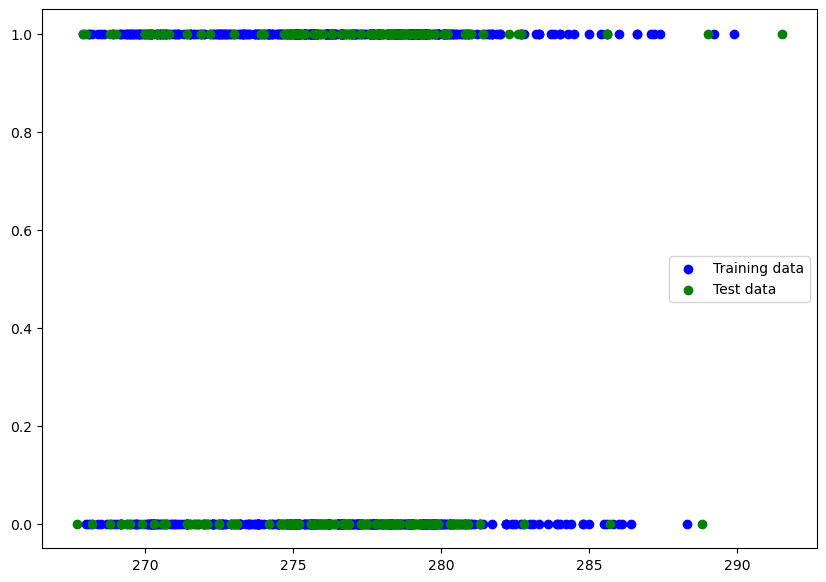

In [500]:
# Visualize the data
plt.figure(figsize=(10, 7))

plt.scatter(X_train['candle_close'], y_train, c="b", label="Training data")

plt.scatter(X_test['candle_close'], y_test, c="g", label="Test data")

# Show a legend
plt.legend(); # Use this semicolon at and to set end

In [501]:
# Normalize data


# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), [
        "Supertrend_Plot",
        "Supertrend_Up_Trend",
        "Supertrend_Down_Trend",
        "SMA_30_MA",
        "SMA_30_Smoothing_Line",
        "SMA_50_MA",
        "SMA_50_Smoothing_Line",
        "SMA_100_MA",
        "SMA_100_Smoothing_Line",
        "SMA_200_MA",
        "SMA_200_Smoothing_Line",
        "EMA_30_EMA",
        "EMA_30_Smoothing_Line",
        "EMA_50_EMA",
        "EMA_50_Smoothing_Line",
        "EMA_100_EMA",
        "EMA_100_Smoothing_Line",
        "EMA_200_EMA",
        "EMA_200_Smoothing_Line",
        "RSI_RSI",
        "RSI_RSIbased_MA",
        "Stochastic_K",
        "Stochastic_D",
        "Bollinger_Bands_Basis",
        "Bollinger_Bands_Upper",
        "Bollinger_Bands_Lower",
        "ATR_ATR",
        "candle_open",
        "candle_close",
        "candle_max",
        "candle_min",
        "candle_volume"]) # turn all values in these columns between 0 and 1
)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)
data_prediction_normal = ct.transform(data_prediction)

In [502]:
X_train.head(1), X_train_normal[0]

(     Supertrend_Plot  Supertrend_Up_Trend  Supertrend_Down_Trend   SMA_30_MA  \
 581            273.5        1.000000e+100             275.036228  273.316667   
 
      SMA_30_Smoothing_Line  SMA_50_MA  SMA_50_Smoothing_Line  SMA_100_MA  \
 581             273.477333    274.556               274.6756     274.992   
 
      SMA_100_Smoothing_Line  SMA_200_MA  ...  Stochastic_D  \
 581                275.0932    279.2945  ...     66.543779   
 
      Bollinger_Bands_Basis  Bollinger_Bands_Upper  Bollinger_Bands_Lower  \
 581                273.125             274.336404             271.913596   
 
       ATR_ATR  candle_open  candle_close  candle_max  candle_min  \
 581  0.662782        273.3         273.7       273.7       273.2   
 
      candle_volume  
 581          89.47  
 
 [1 rows x 32 columns],
 array([2.55760369e-001, 1.00000000e+000, 5.47208871e-100, 2.55385748e-001,
        2.64644004e-001, 3.37688091e-001, 3.44885804e-001, 3.71197933e-001,
        3.77377533e-001, 7.3632812

In [503]:
# Build a neural network model to fit on our normalized data

# tf.random.set_seed(42)

# 1. Create the model (based on insurance_model_2)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(200, name="hidden_layer_1", activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(200, name="hidden_layer_2", activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(80, name="hidden_layer_3", activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, name="last_layer", activation=tf.keras.activations.linear)
], name="model_1")

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001, decay=0.00001 / 200),
                          metrics=["mae"])

# 3. Fit the model
history_training_model_1 = model_1.fit(X_train_normal, y_train, epochs=300, batch_size=4, verbose=0) # 36%
# history_training_model_1 = model_1.fit(X_train_normal, y_train, epochs=600, batch_size=3, verbose=0) # 39.5%
# history_training_model_1 = model_1.fit(X_train_normal, y_train, epochs=200, batch_size=2, verbose=0) # 39.7%
# history_training_model_1 = model_1.fit(X_train_normal, y_train, epochs=100, batch_size=4, verbose=0) # 40.5%
# history_training_model_1 = model_1.fit(X_train_normal, y_train, epochs=4800, batch_size=4, verbose=0) # 36%
# history_training_model_1 = model_1.fit(X_train.to_numpy(), y_train, epochs=800, batch_size=4, verbose=0)

In [504]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (4, 200)                  6600      
                                                                 
 hidden_layer_2 (Dense)      (4, 200)                  40200     
                                                                 
 hidden_layer_3 (Dense)      (4, 80)                   16080     
                                                                 
 last_layer (Dense)          (4, 1)                    81        
                                                                 
Total params: 62,961
Trainable params: 62,961
Non-trainable params: 0
_________________________________________________________________


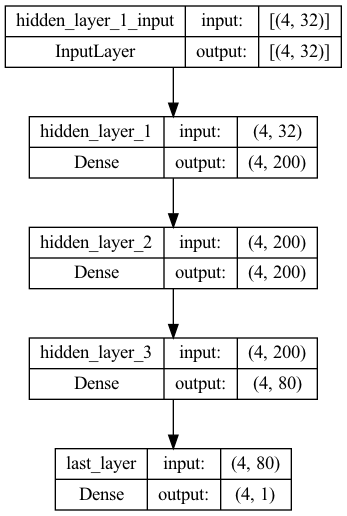

In [505]:
plot_model(model_1, show_shapes=True)

In [506]:
# Evaluate our insurance model trained on normalized data

model_1.evaluate(X_test_normal, y_test)
# model_1.evaluate(X_test.to_numpy(), y_test)

7/7 [==============================] - 0s 958us/step - loss: 0.3604 - mae: 0.3604


[0.3603593111038208, 0.3603593111038208]

Text(0.5, 0, 'epochs')

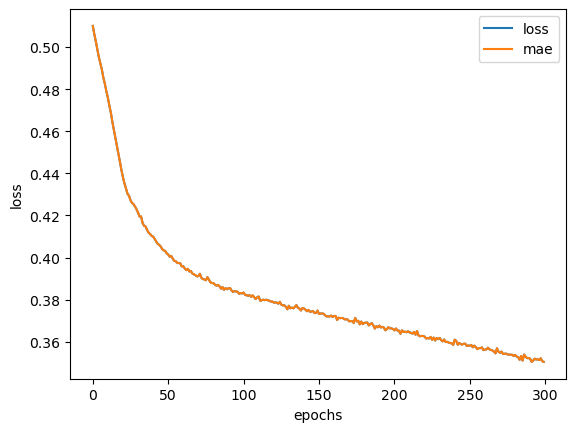

In [507]:
# Plot history (also known as a loss curve or training curve)
pd.DataFrame(history_training_model_1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [508]:
# Try and make a prediction using our model
y_pred = model_1.predict(data_prediction_normal)
# y_pred = model_1.predict(data_prediction.to_numpy())
y_pred

1/1 [==============================] - 0s 32ms/step


array([[1.0597961]], dtype=float32)

In [509]:
y_pred[0][0]

1.0597961